In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

## Masking via histogram


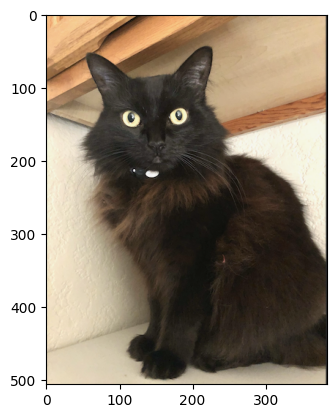

In [142]:
img = plt.imread('chia.png')
plt.imshow(img)

Text(0, 0.5, 'Frequency')

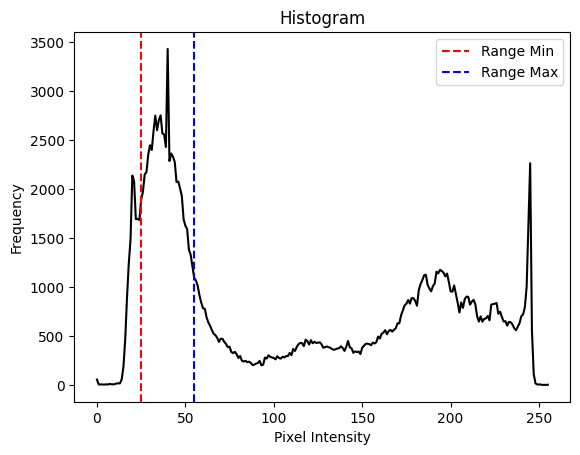

In [143]:
grayscale = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
hist, bins = np.histogram(grayscale.flatten(), bins=256, range=[0, 1])

# returns the index of the maximum value in the histogram
peak = np.argmax(hist)
range_min = max(0, peak - 15)
range_max = min(255, peak + 15)

plt.title("Histogram")
plt.plot(hist, color="black")
plt.axvline(x=range_min, color="red", linestyle="--", label="Range Min")
plt.axvline(x=range_max, color="blue", linestyle="--", label="Range Max")
plt.legend()
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

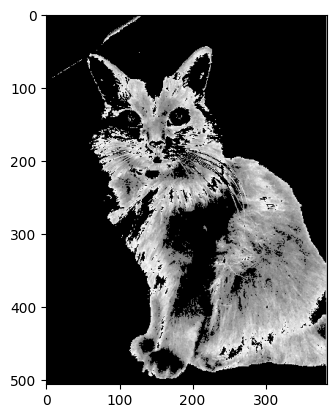

In [144]:
# want the actual intensity value corresponding to the index
lower = bins[range_min]
upper = bins[range_max]

mask = (grayscale >= lower) & (grayscale <= upper)
masked_image = np.where(mask, grayscale, 0)
plt.imshow(masked_image, cmap='gray')

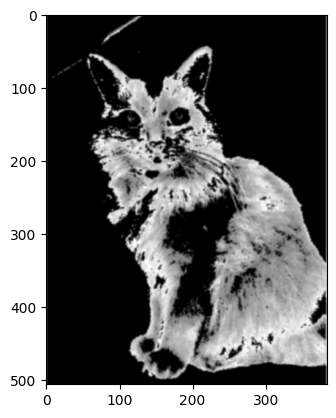

In [146]:
# creates a kernel of size kernel_size. the bigger the kernel size, the more nearby pixels are taken
# into account. bigger kernel size = more blurring

def gaussian_kernel(kernel_size, sigma=1):
    size = int(kernel_size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

img = convolve(masked_image, gaussian_kernel(9))
plt.imshow(img, cmap='gray')
plt.imsave('masked_image.png', img, cmap='gray')